In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook',font_scale=1.25)
from IPython.core.display import HTML,display

C:\Users\HOME\AppData\Local\Temp\ipykernel_5136\12485936.py:6: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML,display


In [73]:
df = pd.read_csv('C:/Users/HOME/OneDrive/Desktop/removed project/ipl stats/Most Runs All Seasons Combine.csv',index_col=[0])
df.head()

,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,Shaun Marsh,11,11,2,616,115,68.44,441,139.68,1,5,59,26
1,Gautam Gambhir,14,14,1,534,86,41.07,379,140.89,0,5,68,8
2,Sanath Jayasuriya,14,14,2,518,114*,43.16,309,167.63,1,2,58,31
3,Shane Watson,15,15,5,472,76*,47.20,311,151.76,0,4,47,19
4,Graeme Smith,11,11,2,441,91,49.00,362,121.82,0,3,54,8


In [74]:
df.isna().sum()

Player    0
Mat       0
Inns      0
NO        0
Runs      0
HS        0
Avg       0
BF        0
SR        0
100       0
50        0
4s        0
6s        0
dtype: int64

In [75]:
df.drop_duplicates(inplace=True)

In [76]:
no_of_seasons=df['Player'].value_counts().reset_index()
no_of_seasons.columns=['Player','No. of Seasons Played']
no_of_seasons.sort_values('Player',inplace=True)
no_of_seasons.reset_index(inplace=True)

In [77]:
players_of_interest = ['Virat Kohli', 'Suresh Raina', 'Rahul Dravid', 'David Miller', 'KL Rahul']

NUMBER OF SEASONS PLAYED

In [95]:
temp=no_of_seasons.sort_values('No. of Seasons Played',ascending=False)[:].reset_index()
filtered_temp = temp[temp['Player'].isin(players_of_interest)]
plt.figure(figsize=(6, 4))
sns.barplot(data=filtered_temp, x='Player', y='No. of Seasons Played', palette='tab10')
plt.title('Number of Seasons Played by Selected Players')
plt.xlabel('Player')
plt.ylabel('Number of Seasons Played')
plt.xticks(rotation=15)
plt.show()

PLAYERS THAT HAVE PLAYED THE MOST MATCHES FROM 2008-2021

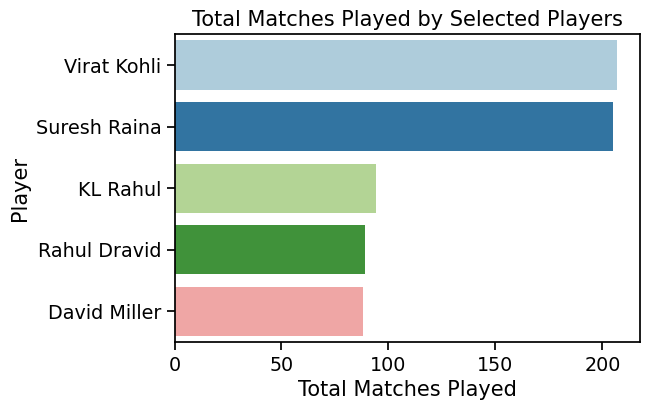

In [79]:
# Grouping by player and calculating total matches played
matches = df.groupby('Player')['Mat'].sum().reset_index()
matches.columns = ['Player', 'Total Matches Played']

# Sorting and selecting the top players of interest
temp = matches[matches['Player'].isin(players_of_interest)].sort_values('Total Matches Played', ascending=False)

# Plotting using a horizontal bar plot
plt.figure(figsize=(6, 4))
sns.barplot(data=temp, x='Total Matches Played', y='Player', palette='Paired')
plt.title('Total Matches Played by Selected Players')
plt.xlabel('Total Matches Played')
plt.ylabel('Player')
plt.show()

PLAYERS THAT HAVE PLAYED MOST MATCHES PER SEASON from 2008-2021 

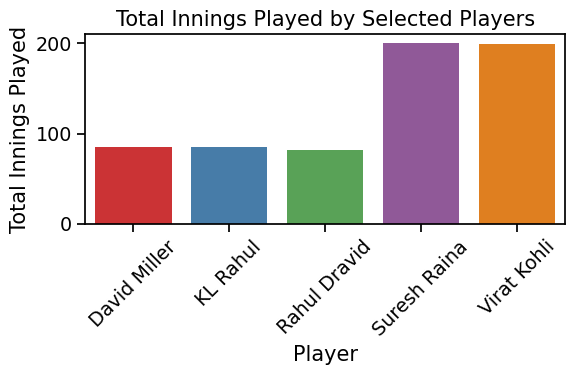

In [80]:
# inns = df.groupby('Player')['Inns'].sum().reset_index()
# inns.columns = ['Player', 'Total Innings Played']

# # Define the players of interest
# players_of_interest = ['Virat Kohli', 'Suresh Raina', 'Rahul Dravid', 'David Miller', 'KL Rahul']

# # Filter the DataFrame to include only the players of interest
# inns_filtered = inns[inns['Player'].isin(players_of_interest)]

# # Plotting the filtered data
# plt.figure(figsize=(6, 4))
# sns.barplot(data=inns_filtered, x='Player', y='Total Innings Played', palette='Set1')
# plt.title('Total Innings Played by Selected Players')
# plt.xlabel('Player')
# plt.ylabel('Total Innings Played')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

PLAYERS WITH MOST RUNS 

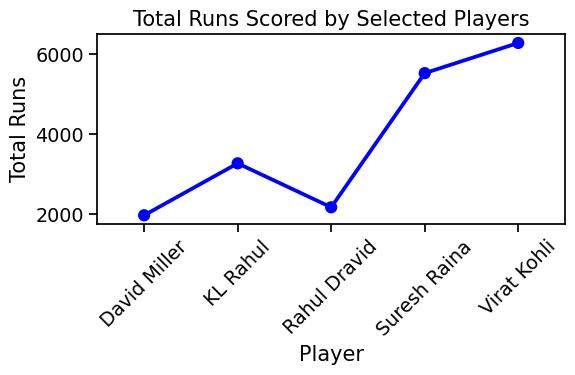

In [81]:
runs_s = df.groupby('Player')['Runs'].sum().reset_index()
runs_s.columns = ['Player', 'Total Runs']

# Define the players of interest
players_of_interest = ['Virat Kohli', 'Suresh Raina', 'Rahul Dravid', 'David Miller', 'KL Rahul']

# Filter the DataFrame to include only the players of interest
runs_filtered = runs_s[runs_s['Player'].isin(players_of_interest)]

# Plotting the filtered data using a point plot
plt.figure(figsize=(6, 4))
sns.pointplot(data=runs_filtered, x='Player', y='Total Runs', color='b', markers='o')
plt.title('Total Runs Scored by Selected Players')
plt.xlabel('Player')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

9. PLAYERS WITH MOST RUNS PER SEASON GIVEN 

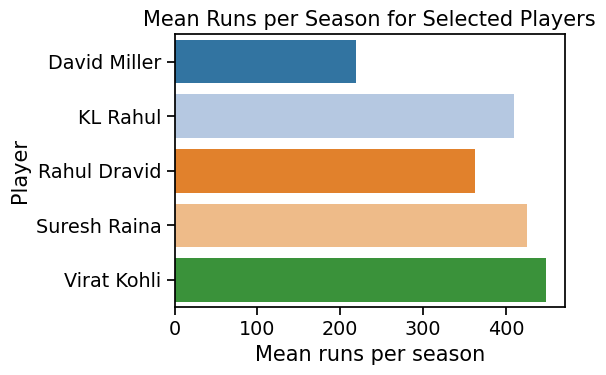

In [82]:
# runs_m = df.groupby('Player')['Runs'].mean().reset_index()
# runs_m.columns = ['Player', 'Mean runs per season']

# # Define the players of interest
# players_of_interest = ['Virat Kohli', 'Suresh Raina', 'Rahul Dravid', 'David Miller', 'KL Rahul']

# # Filter the DataFrame to include only the players of interest
# runs_filtered = runs_m[runs_m['Player'].isin(players_of_interest)]

# # Plotting the filtered data using a horizontal bar plot
# plt.figure(figsize=(6, 4))
# sns.barplot(data=runs_filtered, x='Mean runs per season', y='Player', palette='tab20')
# plt.title('Mean Runs per Season for Selected Players')
# plt.xlabel('Mean runs per season')
# plt.ylabel('Player')
# plt.tight_layout()
# plt.show()

10. PLAYERS WITH HIGHES AVERAGE 

In [83]:
no=df.groupby('Player')['NO'].sum().reset_index()
no.columns=['Player','Number of not outs']

overall_avg=pd.DataFrame()
overall_avg['Player']=runs_s['Player']
overall_avg['Runs']=runs_s['Total Runs']
overall_avg['Inns']=inns['Total Innings Played']
overall_avg['Avg.']=overall_avg['Runs']/(overall_avg['Inns']-no['Number of not outs'])

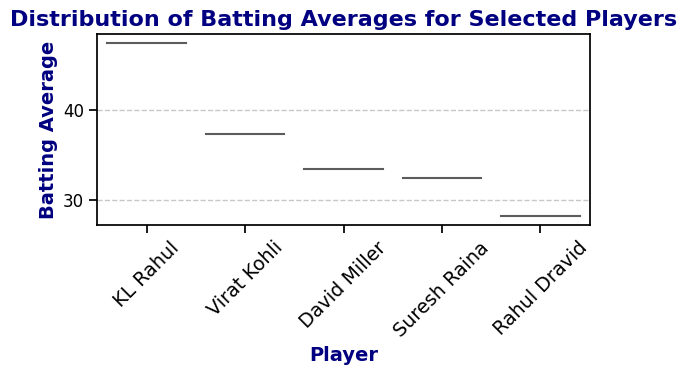

In [84]:

players_of_interest = ['Virat Kohli', 'Suresh Raina', 'Rahul Dravid', 'David Miller', 'KL Rahul']

# Filter the data for the players of interest
temp_players_of_interest = overall_avg[overall_avg['Player'].isin(players_of_interest)]

# Sorting the data for players of interest
temp_players_of_interest = temp_players_of_interest.sort_values('Avg.', ascending=False)

# Setting a custom color palette
custom_palette = ['#FF5733', '#33FF57', '#3385FF', '#FF33DD', '#FFD933']

# Plotting the data using a violin plot with custom style
plt.figure(figsize=(6, 4))
sns.violinplot(data=temp_players_of_interest, x='Player', y='Avg.', palette=custom_palette)
plt.title('Distribution of Batting Averages for Selected Players', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Player', fontsize=14, fontweight='bold', color='navy')
plt.ylabel('Batting Average', fontsize=14, fontweight='bold', color='navy')
plt.xticks(rotation=45)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

14. PLAYERS WITH HIGHEST NUMBER OF NOT OUTS 

C:\Users\HOME\AppData\Local\Temp\ipykernel_5136\2099092269.py:14: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(temp_players_of_interest['Player'], temp_players_of_interest['Number of not outs'], basefmt=' ', use_line_collection=True)


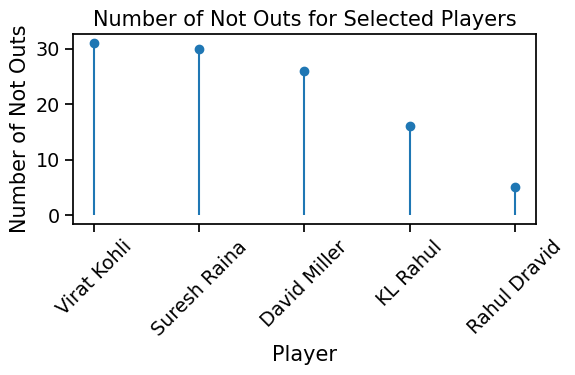

In [96]:
import matplotlib.pyplot as plt

# Define the players of interest
players_of_interest = ['Virat Kohli', 'Suresh Raina', 'Rahul Dravid', 'David Miller', 'KL Rahul']

# Filter the data for the players of interest
temp_players_of_interest = no[no['Player'].isin(players_of_interest)]

# Sorting the data for players of interest
temp_players_of_interest = temp_players_of_interest.sort_values('Number of not outs', ascending=False)

# Create a lollipop plot
plt.figure(figsize=(6, 4))
plt.stem(temp_players_of_interest['Player'], temp_players_of_interest['Number of not outs'], basefmt=' ', use_line_collection=True)
plt.title('Number of Not Outs for Selected Players')
plt.xlabel('Player')
plt.ylabel('Number of Not Outs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


15. PLAYERS WITH HIGHES NUMBER OF BALLS FACED

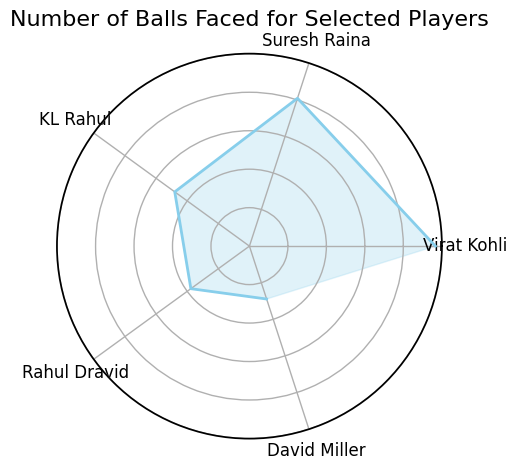

In [86]:
import numpy as np

# Define the players of interest
players_of_interest = ['Virat Kohli', 'Suresh Raina', 'Rahul Dravid', 'David Miller', 'KL Rahul']

# Filter the data for the players of interest
temp_players_of_interest = bf_s[bf_s['Player'].isin(players_of_interest)]

# Sorting and plotting the data for players of interest
temp_players_of_interest = temp_players_of_interest.sort_values('Number of balls faced', ascending=False)

# Extracting player names and number of balls faced
players = temp_players_of_interest['Player']
balls_faced = temp_players_of_interest['Number of balls faced']

# Number of variables (players)
num_players = len(players)

# Create a radar chart
angles = np.linspace(0, 2 * np.pi, num_players, endpoint=False).tolist()

fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(polar=True))
ax.fill(angles, balls_faced, color='skyblue', alpha=0.25)
ax.plot(angles, balls_faced, color='skyblue', linewidth=2)
ax.set_yticklabels([])
ax.set_xticks(angles)
ax.set_xticklabels(players, fontsize=12)
ax.set_title('Number of Balls Faced for Selected Players', fontsize=16, pad=20)

plt.show()


17. HIGHEST STRIKE RATE17. HIGHEST STRIKE RATE

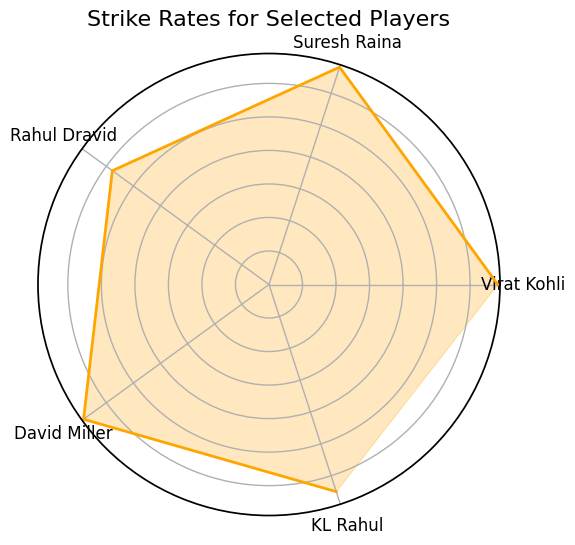

In [87]:
import numpy as np

# Assuming runs_s and bf_s contain statistics of runs and balls faced, respectively

# Define the players of interest
players_of_interest = ['Virat Kohli', 'Suresh Raina', 'Rahul Dravid', 'David Miller', 'KL Rahul']

# Filter the data for the players of interest
runs_s_filtered = runs_s[runs_s['Player'].isin(players_of_interest)]
bf_s_filtered = bf_s[bf_s['Player'].isin(players_of_interest)]

# Calculate the strike rates for each player
strike_rates = (runs_s_filtered['Total Runs'] / bf_s_filtered['Number of balls faced']) * 100

# Number of players
num_players = len(players_of_interest)

# Create a radar chart
angles = np.linspace(0, 2 * np.pi, num_players, endpoint=False).tolist()

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, strike_rates, color='orange', alpha=0.25)
ax.plot(angles, strike_rates, color='orange', linewidth=2)
ax.set_yticklabels([])
ax.set_xticks(angles)
ax.set_xticklabels(players_of_interest, fontsize=12)
ax.set_title('Strike Rates for Selected Players', fontsize=16, pad=20)

plt.show()


PLAYERS WITH MOST NUMBER OF 50S

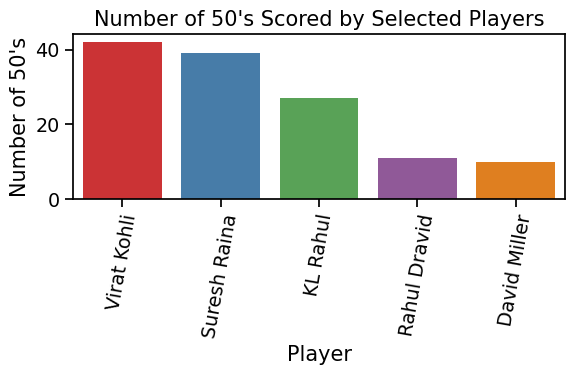

In [88]:
# Assuming fifties_s is a DataFrame containing statistics of 50s scored
fifties_s = df.groupby('Player')['50'].sum().reset_index()
fifties_s.columns = ['Player', "Number of 50's"]

# Filter the data for the top 50 players with the most 50s
temp = fifties_s.sort_values("Number of 50's", ascending=False)[:50]

# Filter the data for the players of interest
temp_players_of_interest = temp[temp['Player'].isin(players_of_interest)]

# Sorting and plotting the data for players of interest
plt.figure(figsize=(6, 4))
sns.barplot(data=temp_players_of_interest, x='Player', y="Number of 50's", palette='Set1')
plt.title("Number of 50's Scored by Selected Players")
plt.xlabel('Player')
plt.ylabel("Number of 50's")
plt.xticks(rotation=80)
plt.tight_layout()
plt.show()


26. PLAYERS WITH MOST 100S

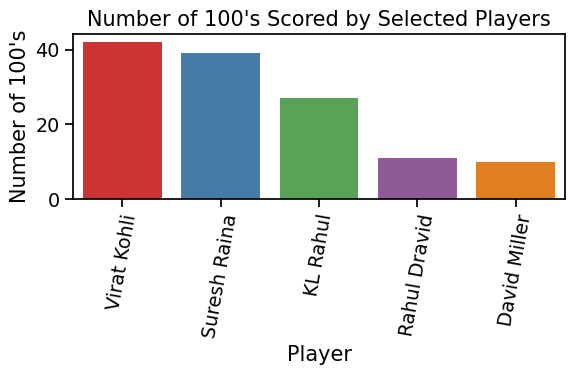

In [98]:
fifties_s = df.groupby('Player')['50'].sum().reset_index()
fifties_s.columns = ['Player', "Number of 100's"]

# Filter the data for the top 50 players with the most 50s
temp = fifties_s.sort_values("Number of 100's", ascending=False)[:50]

# Filter the data for the players of interest
players_of_interest = ['Virat Kohli', 'Suresh Raina', 'Rahul Dravid', 'David Miller', 'KL Rahul']
temp_players_of_interest = temp[temp['Player'].isin(players_of_interest)]

# Sorting and plotting the data for players of interest
plt.figure(figsize=(6,4))
sns.barplot(data=temp_players_of_interest, x='Player', y="Number of 100's", palette='Set1')
plt.title("Number of 100's Scored by Selected Players")
plt.xlabel('Player')
plt.ylabel("Number of 100's")
plt.xticks(rotation=80)
plt.tight_layout()
plt.show()

PLAYER WITH MOST 4S

C:\Users\HOME\AppData\Local\Temp\ipykernel_5136\835937627.py:18: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=temp_players_of_interest, x='Player', y="Number of 4's", palette='Set1', jitter=True, size=10)


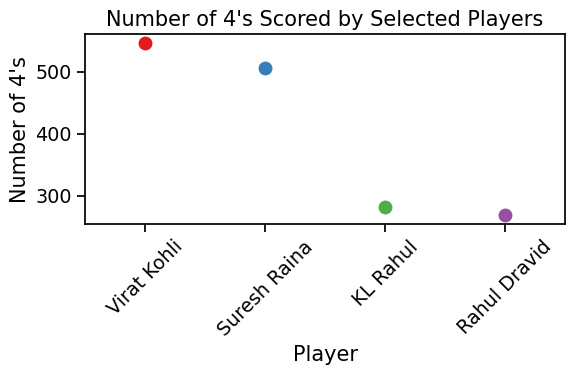

In [90]:
# Importing necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Define the players of interest
players_of_interest = ['Virat Kohli', 'Suresh Raina', 'Rahul Dravid', 'David Miller', 'KL Rahul']

# Filter the data for the top 50 players with the most 4s
fours_s = df.groupby('Player')['4s'].sum().reset_index()
fours_s.columns = ['Player', "Number of 4's"]
temp = fours_s.sort_values("Number of 4's", ascending=False)[:50]

# Filter the data for the players of interest
temp_players_of_interest = temp[temp['Player'].isin(players_of_interest)]

# Create a dot chart using stripplot
plt.figure(figsize=(6,4))
sns.stripplot(data=temp_players_of_interest, x='Player', y="Number of 4's", palette='Set1', jitter=True, size=10)
plt.title("Number of 4's Scored by Selected Players")
plt.xlabel('Player')
plt.ylabel("Number of 4's")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


31. PLAYER WITH MOST 6S

C:\Users\HOME\AppData\Local\Temp\ipykernel_5136\729274993.py:10: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=sixes_s_filtered, x='Player', y="Number of 6's", palette='Set1', size=10, jitter=True)


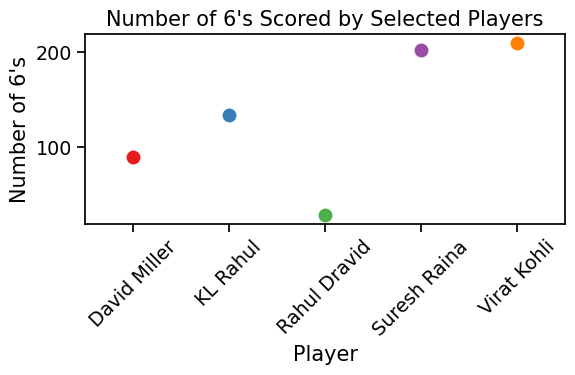

In [91]:
# Define the players of interest
players_of_interest = ['Virat Kohli', 'Suresh Raina', 'Rahul Dravid', 'David Miller', 'KL Rahul']

# Assuming you have the necessary dataframes already defined (sixes_s)
# Filter the dataframes for players of interest
sixes_s_filtered = sixes_s[sixes_s['Player'].isin(players_of_interest)]

# Create a strip plot
plt.figure(figsize=(6,4))
sns.stripplot(data=sixes_s_filtered, x='Player', y="Number of 6's", palette='Set1', size=10, jitter=True)
plt.title("Number of 6's Scored by Selected Players")
plt.xlabel('Player')
plt.ylabel("Number of 6's")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

35. PLAYERS WITH LEAST NUMBER OF BALLS FACED PER BOUNDARY 

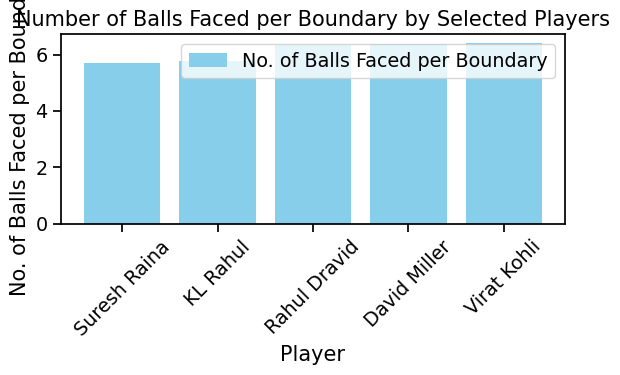

In [92]:
import matplotlib.pyplot as plt

# Define the players of interest
players_of_interest = ['Virat Kohli', 'Suresh Raina', 'Rahul Dravid', 'David Miller', 'KL Rahul']

# Assuming you have the necessary dataframes already defined (fours_s, bf_s, sixes_s, inns)
# Filter the dataframes for players of interest
fours_s_filtered = fours_s[fours_s['Player'].isin(players_of_interest)]
bf_s_filtered = bf_s[bf_s['Player'].isin(players_of_interest)]
sixes_s_filtered = sixes_s[sixes_s['Player'].isin(players_of_interest)]
inns_filtered = inns[inns['Player'].isin(players_of_interest)]

# Calculate the average number of balls faced per boundary for players of interest
boundary_count = pd.DataFrame()
boundary_count['Player'] = fours_s_filtered['Player']
boundary_count['No. of Balls Faced per Boundary'] = bf_s_filtered['Number of balls faced'] / (sixes_s_filtered["Number of 6's"] + fours_s_filtered["Number of 4's"])

# Filter the data for players with at least 50 innings played
temp = boundary_count[inns_filtered['Total Innings Played'] >= 50]

# Sort the data by number of balls faced per boundary
temp = temp.sort_values('No. of Balls Faced per Boundary', ascending=True)

# Plotting the data
plt.figure(figsize=(6,4))

# Stacked bar chart
plt.bar(temp['Player'], temp['No. of Balls Faced per Boundary'], color='skyblue', label='No. of Balls Faced per Boundary')

# Adding labels and title
plt.title('Number of Balls Faced per Boundary by Selected Players')
plt.xlabel('Player')
plt.ylabel('No. of Balls Faced per Boundary')

# Rotating player names for better readability
plt.xticks(rotation=45)

# Adding legend
plt.legend()

plt.tight_layout()
plt.show()


36. HIGHEST PERCENTAGE OF RUNS THORUGH BOUNDARIES

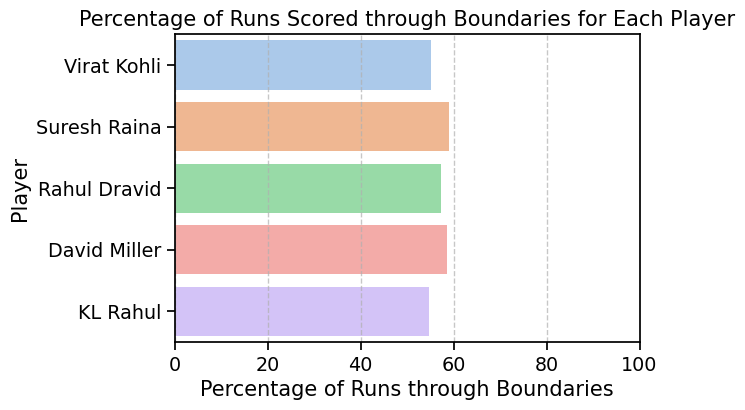

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for the players of interest
fours_s_filtered = fours_s[fours_s['Player'].isin(players_of_interest)]
sixes_s_filtered = sixes_s[sixes_s['Player'].isin(players_of_interest)]
runs_s_filtered = runs_s[runs_s['Player'].isin(players_of_interest)]

# Calculate the percentage of runs scored through boundaries for each player
boundary_runs_percentage = ((fours_s_filtered["Number of 4's"] * 4 + sixes_s_filtered["Number of 6's"] * 6) / runs_s_filtered['Total Runs']) * 100

# Create a horizontal bar plot
plt.figure(figsize=(6,4))
sns.barplot(x=boundary_runs_percentage, y=players_of_interest, palette='pastel')
plt.xlabel('Percentage of Runs through Boundaries')
plt.ylabel('Player')
plt.title('Percentage of Runs Scored through Boundaries for Each Player')
plt.xlim(0, 100)  # Limiting x-axis to show percentages
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Adding grid lines for better readability
plt.show()


In [94]:
import pickle
with open('data_and_plot.pickle', 'wb') as f:
    pickle.dump((df, plt.gcf()), f)

<Figure size 640x480 with 0 Axes>